# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading The Data

In [6]:
# loading the dataset from the csv file
df = pd.read_csv('../Data/Titanic-Dataset.xls')

# Data Overview

In [7]:
print("First Five Rows:\n")
df.head()

First Five Rows:



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data has columns:
- Survival: Whether a passenger survived or not (0 or 1)
- Pclass: The socio-ecomonic class
    - Upper: 1
    - Middle: 2
    - Lower: 3
- Sex: Gender of the passenger (Male or Female)
- Age: Age in years (Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5)
- SibSp: Number of siblings / spouses aboard the Titanic
- Parch: Number of parents / children aboard the Titanic
- Ticket: Ticket number
- Fare: Passenger fare
- Cabin: Cabin number
- Embarked: Port of Embarkation
    - C: Cherbourg
    - Q: Queenstown
    - S: Southampton


In [8]:
print("Number of Rows and Columns:\n")
df.shape

Number of Rows and Columns:



(891, 12)

- There are 891 rows and 12 columns

In [9]:
print("Details of Columns Regarding Data Type, Missing Value, and Entries\n")
df.info()

Details of Columns Regarding Data Type, Missing Value, and Entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- numerical data type = PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare, 
- Object data type = Name, Sex, TIcket, Cabin, Embarked
- We might need to change data type of age from float to integer since age can't be a fraction
- Sex, Embarked to be changed into category type from object type. 
- We might need to remove PassengerId from dataset since it can't be considered for prediction
- Age, Cabin, and Embarked have missing value. We can't ignore these for now since they might have relationship. Let's observe and decide in further steps.

In [10]:
print("Summary Statistics:\n")
df.describe()

Summary Statistics:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- This is a summary statistics of the numerical columns in the dataset.
- The mean of the Survived col shows 38% survival rate. Roughly 1 in 3 survive the Titanic
- About 75% of passenger come under age 38 despite maximum age being 80. There might be outliers.

In [11]:
print("Missing Values Percentage Across Columns:\n")
df.isnull().sum()/len(df)*100

Missing Values Percentage Across Columns:



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- Among all columns in the dataset, Age, Cabin and Embarked have missing values.
- 20% from age are missing values. We need to fill the missing values since age can't be ignored.
- 77% from Cabin are missing values. We can remove this column completely from the dataset.
- 0.22% from Embarked are missing values. We need to fill it as well.
  

In [12]:
sum(df.duplicated())

0

- There are no duplicate rows.

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols.tolist())

Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [14]:
object_cols = df.select_dtypes(include=['object']).columns
print("Object Columns:", object_cols.tolist())

Object Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [15]:
#lets change sex and embarked to categorical data
# Let's convert them into categorical features to save some memory. 
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')



In [16]:
cat_cols = df.select_dtypes(include=['category']).columns
print("Catgeory Columns:", object_cols.tolist())

Catgeory Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


# Univariate Analysis

### Survived Features - Target Feature

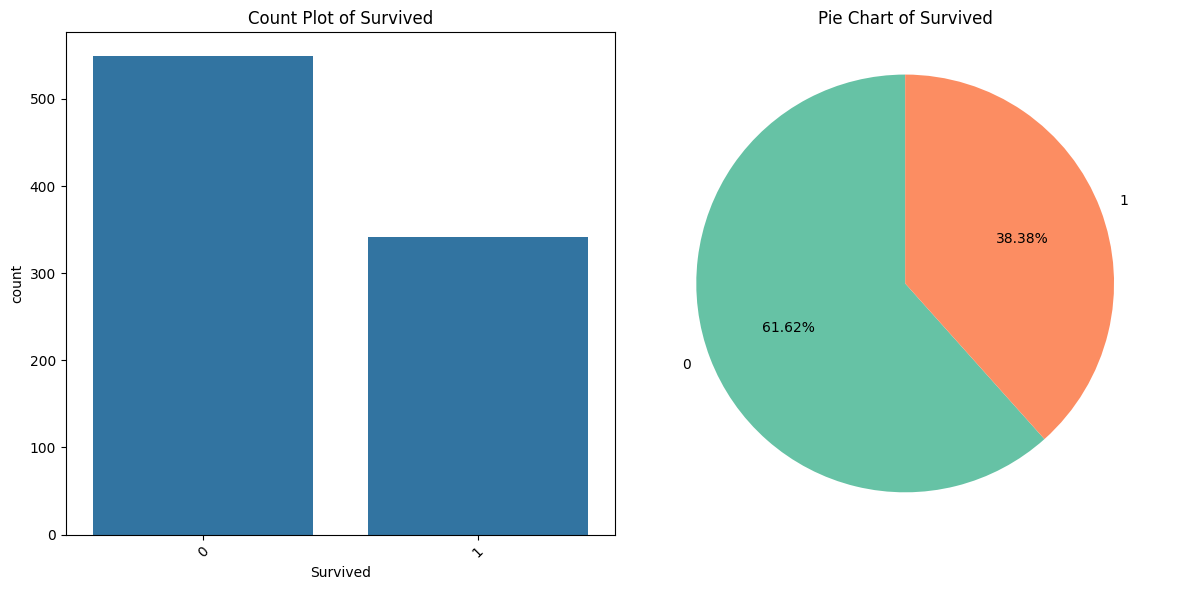

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row

col = 'Survived'  # Define the column name

# Count plot 
sns.countplot(x=df[col], ax=axes[0])
axes[0].set_title(f"Count Plot of {col}")
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
value_counts = df[col].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', 
            startangle=90, colors=sns.color_palette("Set2", len(value_counts)))
axes[1].set_title(f"Pie Chart of {col}")
axes[1].axis('equal')  # Ensures the pie chart is circular

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

- Only 38.4% of passengers survived 
- 61.62% did not survived
- Survived are categorical in nature. however, values are in numbers. Countplot and pie chart can be useful.

### Pclass

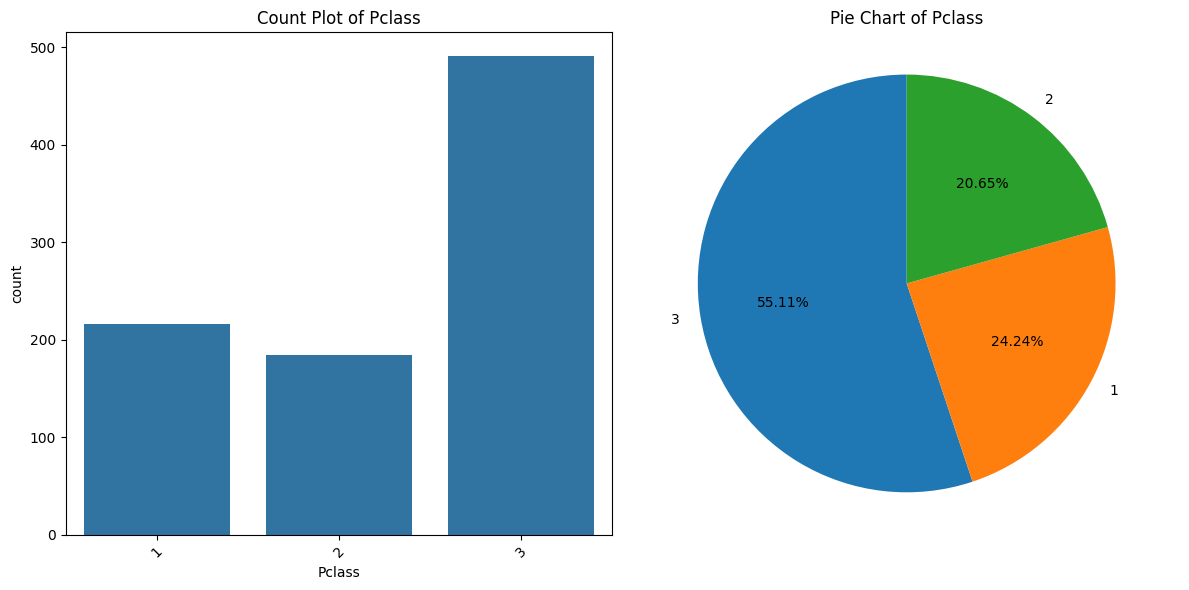

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row

col = 'Pclass'  # Define the column name

# Count plot 
sns.countplot(x=df[col], ax=axes[0])
axes[0].set_title(f"Count Plot of {col}")
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
value_counts = df[col].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', 
            startangle=90)
axes[1].set_title(f"Pie Chart of {col}")
axes[1].axis('equal')  # Ensures the pie chart is circular

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

- There are three Pclasses.
- Maximum number of passenger belong to 3rd class with 55.11%
- Fare and class can have relation such that first class means high fare and 3rd class means low fare.
- 2nd class has minimum passenger number.
- Also, it can be assumed that lowest class passenger have high risk since they can be entertained much less.
- Since categorical in nature, countplot and pie chart are useful.

### Age

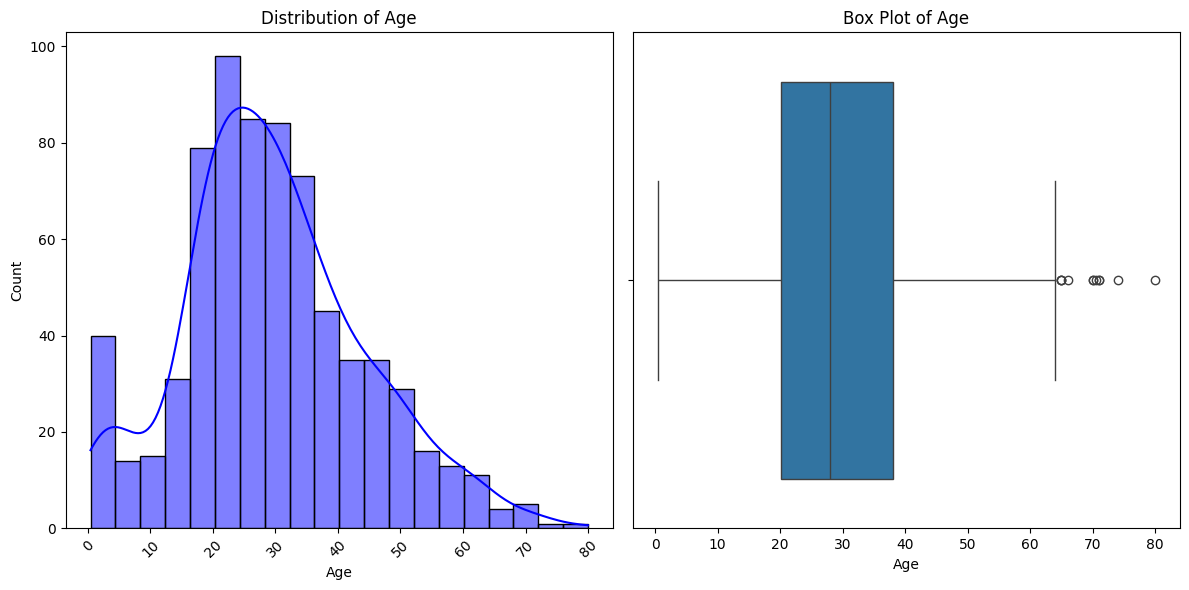

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row

col = 'Age'  # Define the column name

# Histogram
sns.histplot(df[col], kde=True, color='blue', ax=axes[0])  # Assign to the first subplot
axes[0].set_title(f"Distribution of {col}")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot (Instead of Pie Chart, since 'Age' is numerical)
sns.boxplot(data=df, x=col, ax=axes[1])  # Assign to second subplot
axes[1].set_title(f"Box Plot of {col}")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()



- since quantitative in nature hisplot and boxplot can be useful.
- since skewed, we might have to fill null values with median.
- MOst of the passenger are between age group of 15 to 40

In [26]:
#lets fill null of age with median and see distribution
df['Age'] = df['Age'].fillna(df['Age'].median())


In [27]:
df['Age'] = df['Age'].astype('int64')

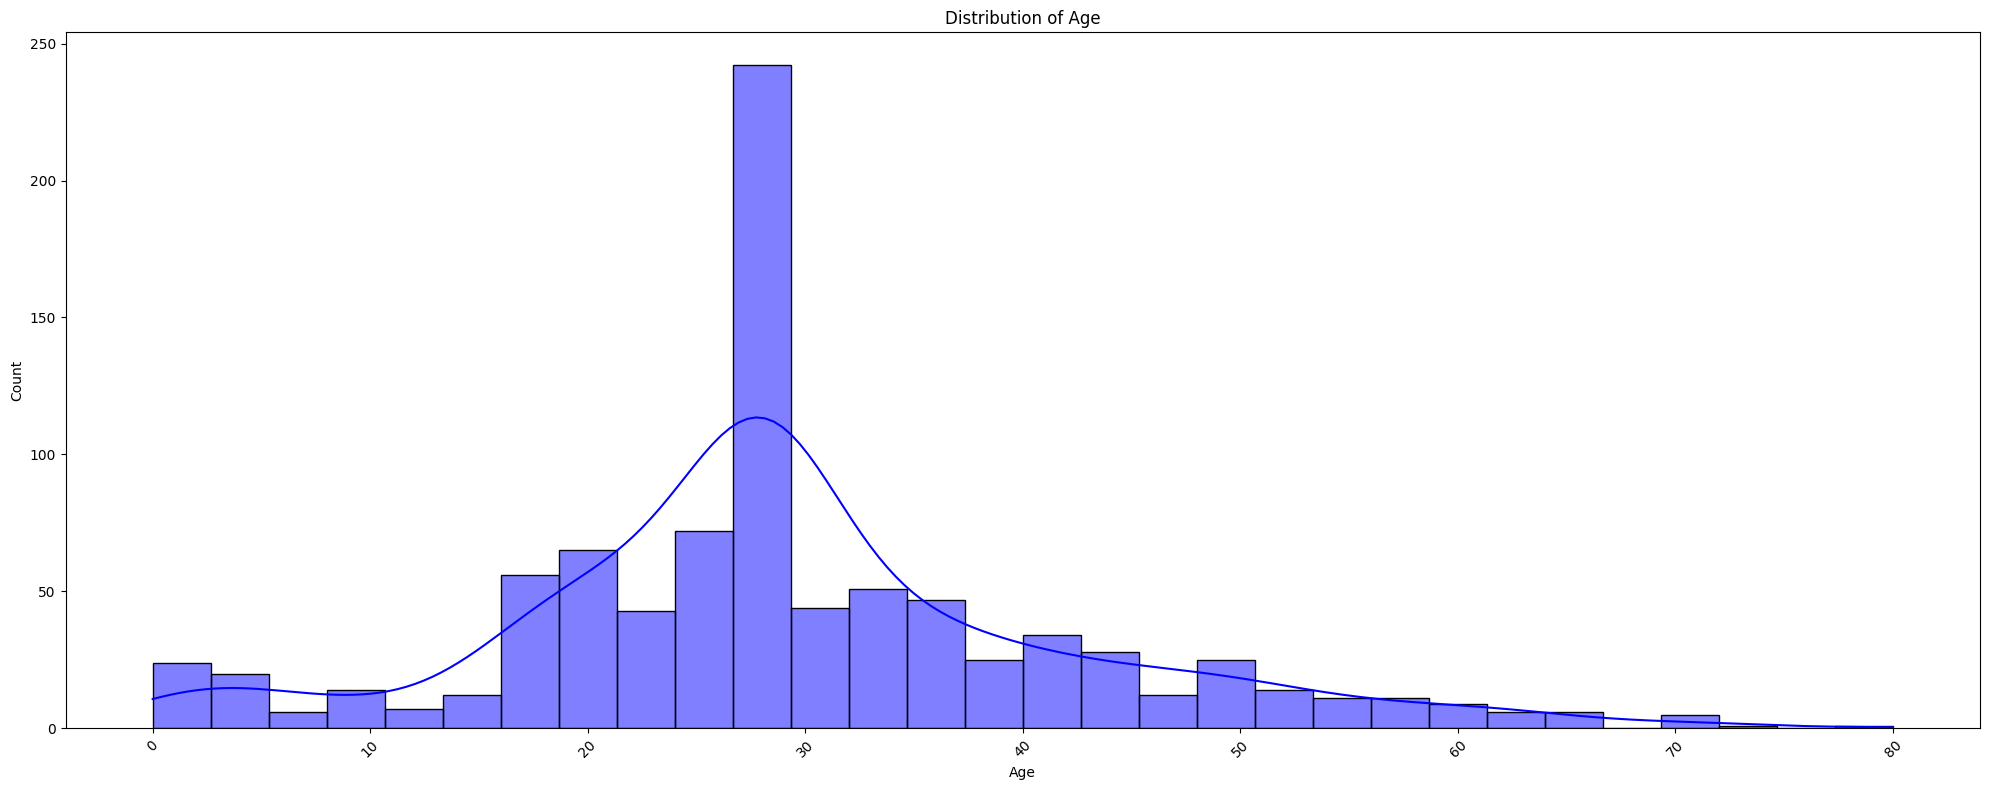

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))

col = 'Age'  # Define the column name

# Histogram
sns.histplot(df[col], kde=True, color='blue', ax=ax)  
ax.set_title(f"Distribution of {col}")
ax.tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()  # Corrected line
plt.show()


### SibSp
- Indicates the total number of Siblings and spouses on board for that passenger

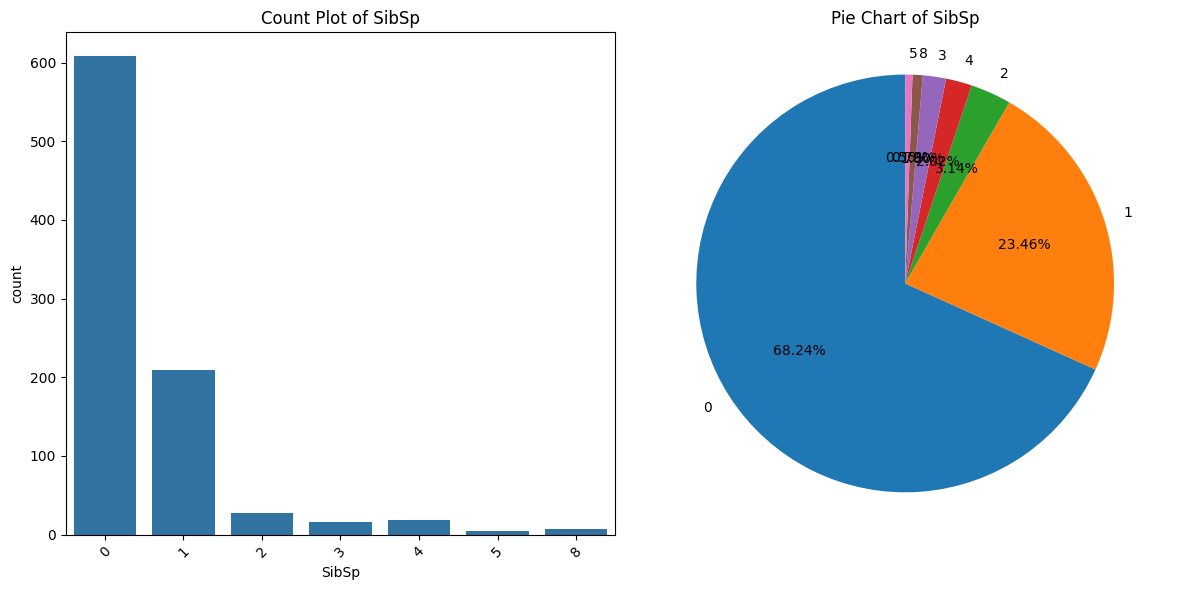

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row

col = 'SibSp'  # Define the column name

# Count plot 
sns.countplot(x=df[col], ax=axes[0])
axes[0].set_title(f"Count Plot of {col}")
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
value_counts = df[col].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', 
            startangle=90)
axes[1].set_title(f"Pie Chart of {col}")
axes[1].axis('equal')  # Ensures the pie chart is circular

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

- About 68.24% of passenger have Sibp value as 0.
- 

### Parch
-  Indicates the total number of parents and children on on board

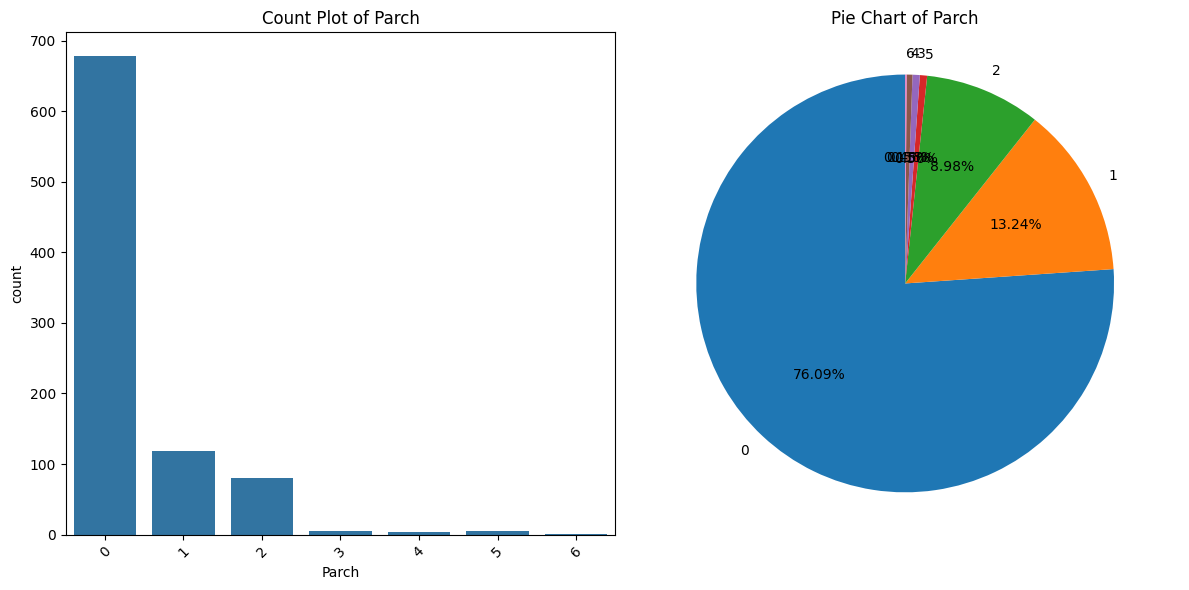

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row

col = 'Parch'  # Define the column name

# Count plot 
sns.countplot(x=df[col], ax=axes[0])
axes[0].set_title(f"Count Plot of {col}")
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
value_counts = df[col].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', 
            startangle=90)
axes[1].set_title(f"Pie Chart of {col}")
axes[1].axis('equal')  # Ensures the pie chart is circular

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

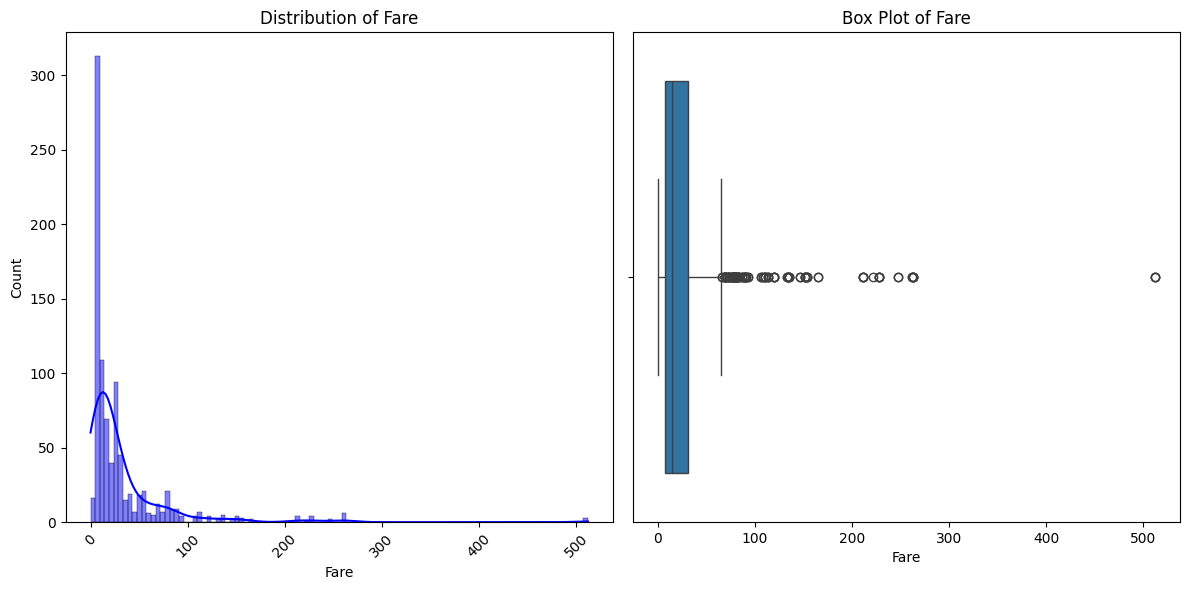

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row

col = 'Fare'  # Define the column name

# Histogram
sns.histplot(df[col], kde=True, color='blue', ax=axes[0])  # Assign to the first subplot
axes[0].set_title(f"Distribution of {col}")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot (Instead of Pie Chart, since 'Age' is numerical)
sns.boxplot(data=df, x=col, ax=axes[1])  # Assign to second subplot
axes[1].set_title(f"Box Plot of {col}")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

In [111]:
max_fare, min_fare = df["Fare"].max(), df["Fare"].min()

print(f"Number of passengers who paid ${min_fare}: ", df[df["Fare"] == min_fare].shape[0])
print(f"Number of passengers who paid ${max_fare}: ", df[df["Fare"] == max_fare].shape[0])
print(f"Fare given by maximum number of passengers: $", list(dict(df["Fare"].value_counts()).keys())[0])

Number of passengers who paid $0.0:  15
Number of passengers who paid $512.3292:  3
Fare given by maximum number of passengers: $ 8.05


### Sex

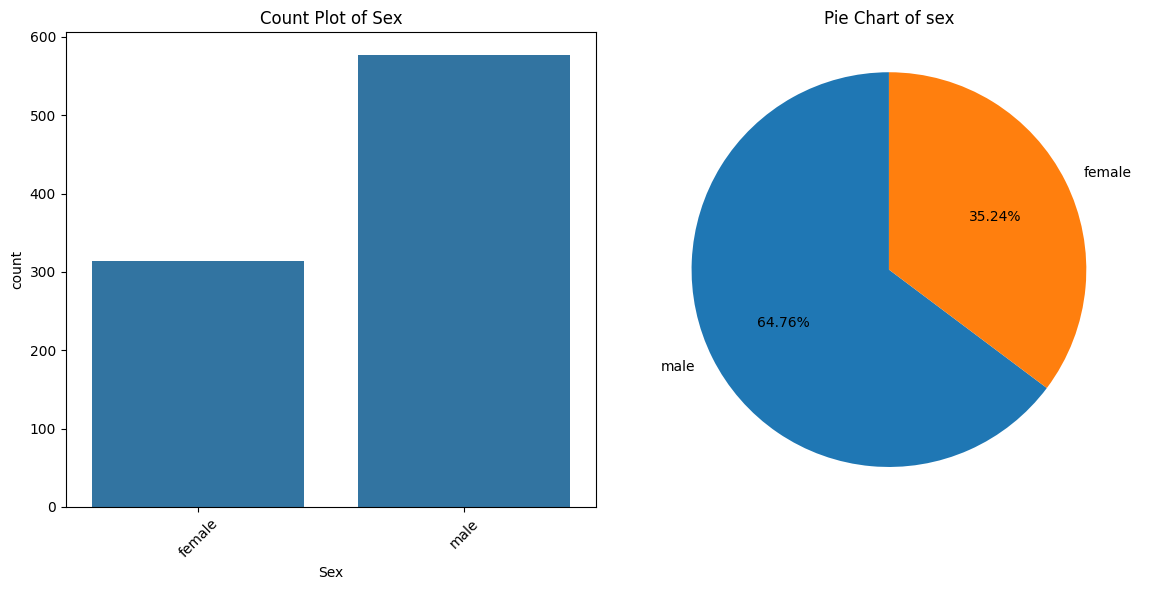

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row
    
    # Count plot 
sns.countplot(x='Sex', data=df, ax=axes[0])
axes[0].set_title(f"Count Plot of Sex")
axes[0].tick_params(axis='x', rotation=45)

    # Pie chart
value_counts = df['Sex'].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', startangle=90)
axes[1].set_title(f"Pie Chart of sex")
axes[1].axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

- 64.76% are male and rest are female

### Embarked

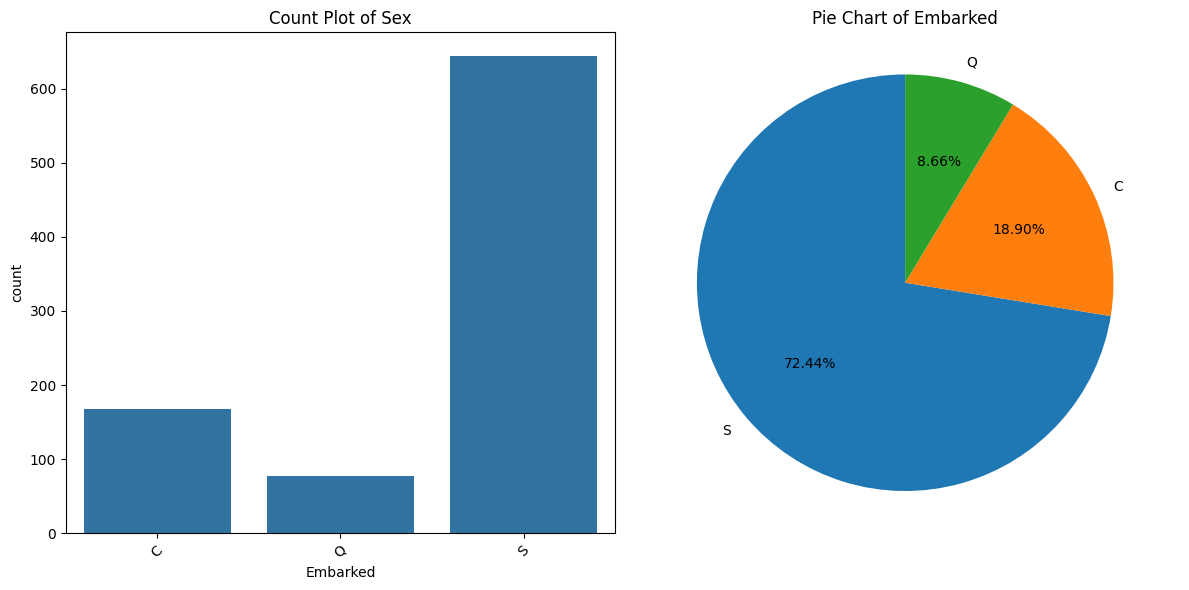

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create two subplots in a single row
    
    # Count plot 
sns.countplot(x='Embarked', data=df, ax=axes[0])
axes[0].set_title(f"Count Plot of Sex")
axes[0].tick_params(axis='x', rotation=45)

    # Pie chart
value_counts = df['Embarked'].value_counts()
axes[1].pie(value_counts, labels=value_counts.index, autopct='%1.2f%%', startangle=90)
axes[1].set_title(f"Pie Chart of Embarked")
axes[1].axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [35]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

### PasengerID
- PassengerID seems to be of no use is dropped in later stage

### Name 
- The name column can be used to determine sex (with words like Miss, Mrs, Mr)
- Might be useful to determine passenger age group like child, middle age, etc.
- Can be used to group into families
- Can be used to determine the relationship between Survived columns. 
- In Feature engineering part, we will try to make new feature out of it.

# Multivariate

## Bivariate Analysis: Scatter plots and Pair plots


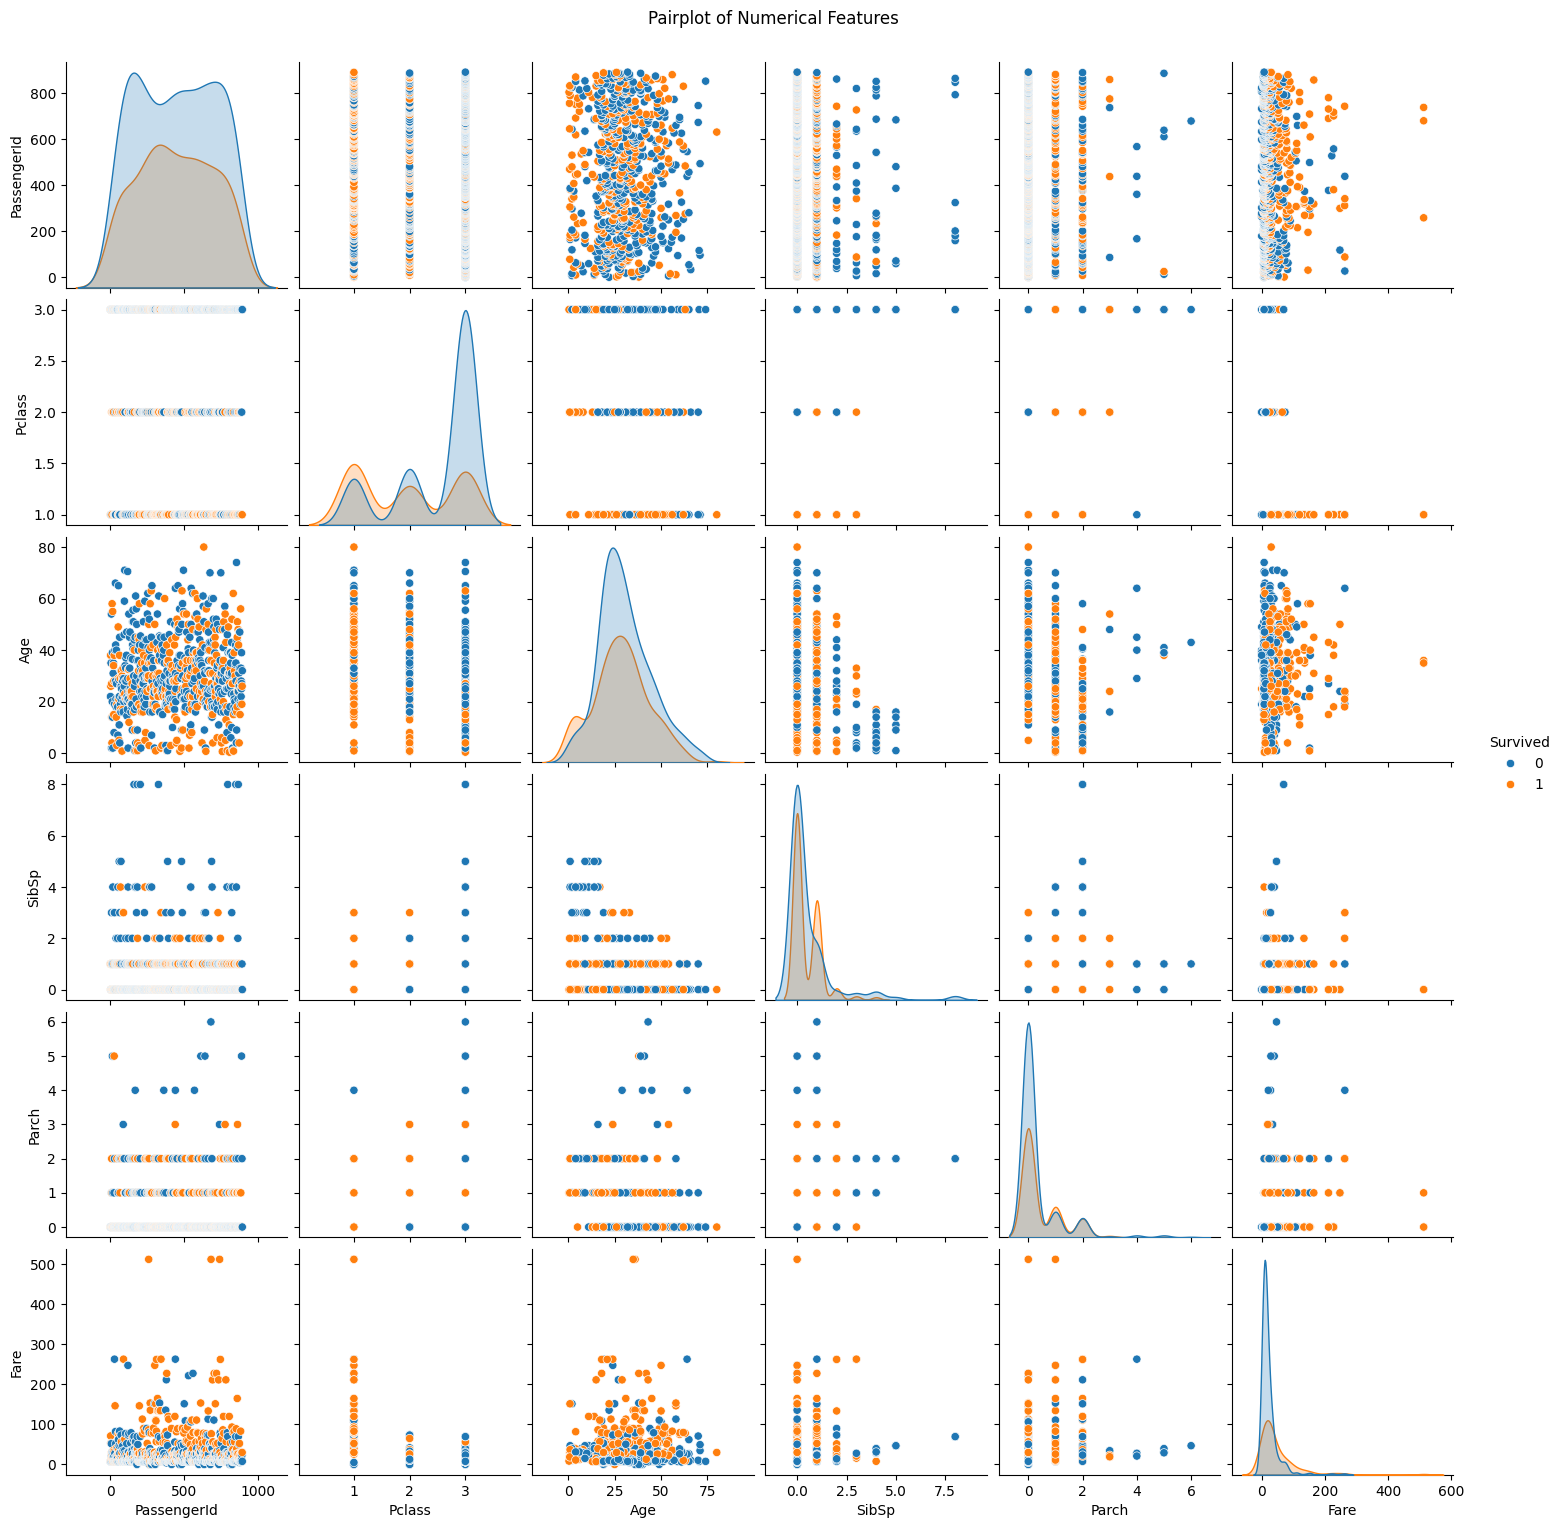

In [26]:
sns.pairplot(df, hue='Survived')  
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

## Relationship with Target 

## Pclass

In [48]:
sur_upper = df[(df["Survived"] == 1) & (df["Pclass"] == 1)].shape[0]
sur_middle = df[(df["Survived"] == 1) & (df["Pclass"] == 2)].shape[0]
sur_lower = df[(df["Survived"] == 1) & (df["Pclass"] == 3)].shape[0]

print("Upper class survival: ", sur_upper)
print("Middle class survival: ", sur_middle)
print("Lower class survival: ", sur_lower)

Upper class survival:  136
Middle class survival:  87
Lower class survival:  119


In [113]:
df [['Pclass','Survived']].groupby('Pclass').aggregate(['count','mean'])

Survived          
          count      mean
Pclass                   
1           216  0.629630
2           184  0.472826
3           491  0.242363

- There are 216, 184 & 491 1st, 2nd and 3rd class passengers respectively.
-  2nd class passengers had twice the survival rate of 3rd class and 1st class passengers 
- 63% of the first class people survived while 24% of the lower class survived

In [120]:
df[['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).mean()*100

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_360\351498192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['Sex', 'Pclass','Survived']].groupby(['Pclass', 'Sex']).mean()*100


Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

- almost all Pclass 1 females survive
- Pclass 3 female survival is 50% and almost all (86%) Pclass 3 males not survived

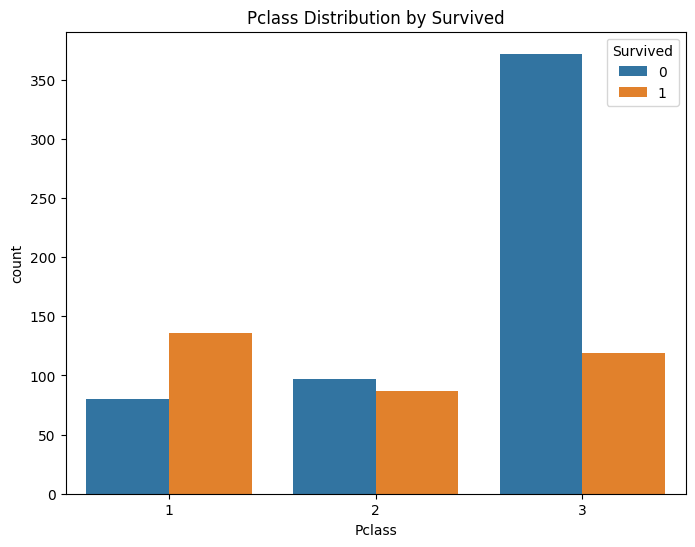

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title(f"Pclass Distribution by Survived")
plt.show()


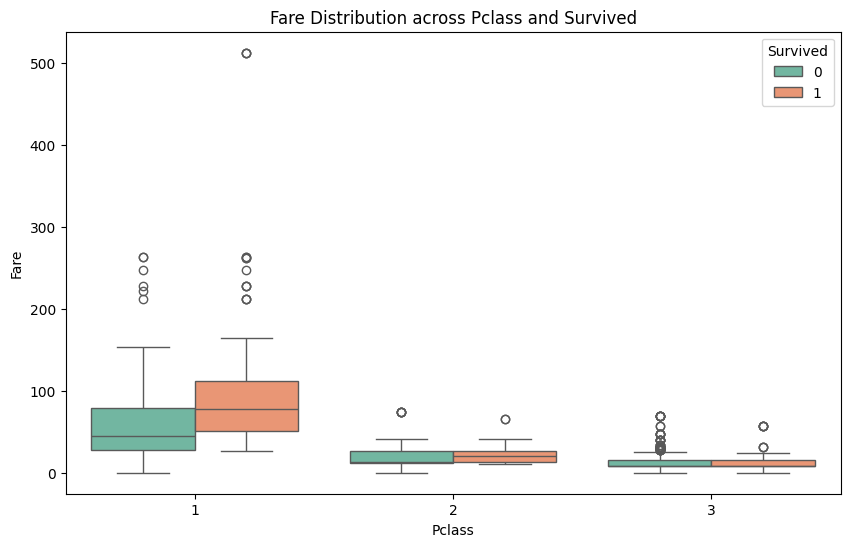

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pclass', y='Fare', hue='Survived', palette='Set2')
plt.title('Fare Distribution across Pclass and Survived')
plt.show()

### Sex

In [115]:
df [['Sex','Survived']].groupby('Sex').aggregate(['count','mean'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_360\3878945796.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df [['Sex','Survived']].groupby('Sex').aggregate(['count','mean'])


Survived          
          count      mean
Sex                      
female      314  0.742038
male        577  0.188908

- 74% of females survived and only 19% males survived.
- The overall survival rate was 38.3% as seen earlier. So it might be skewed in favour of females

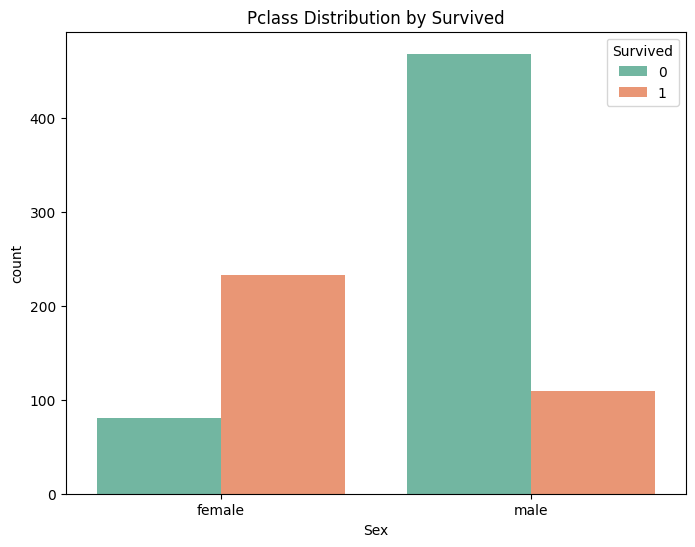

In [38]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sex", hue="Survived", palette="Set2")
plt.title(f"Pclass Distribution by Survived")
plt.show()


### Age

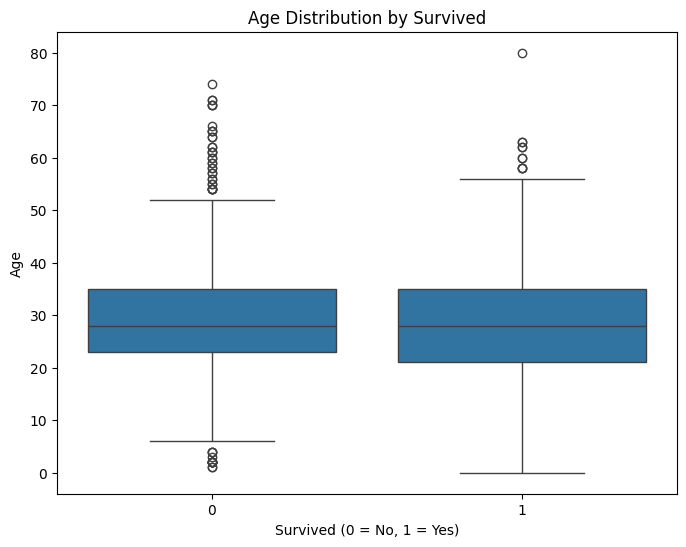

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

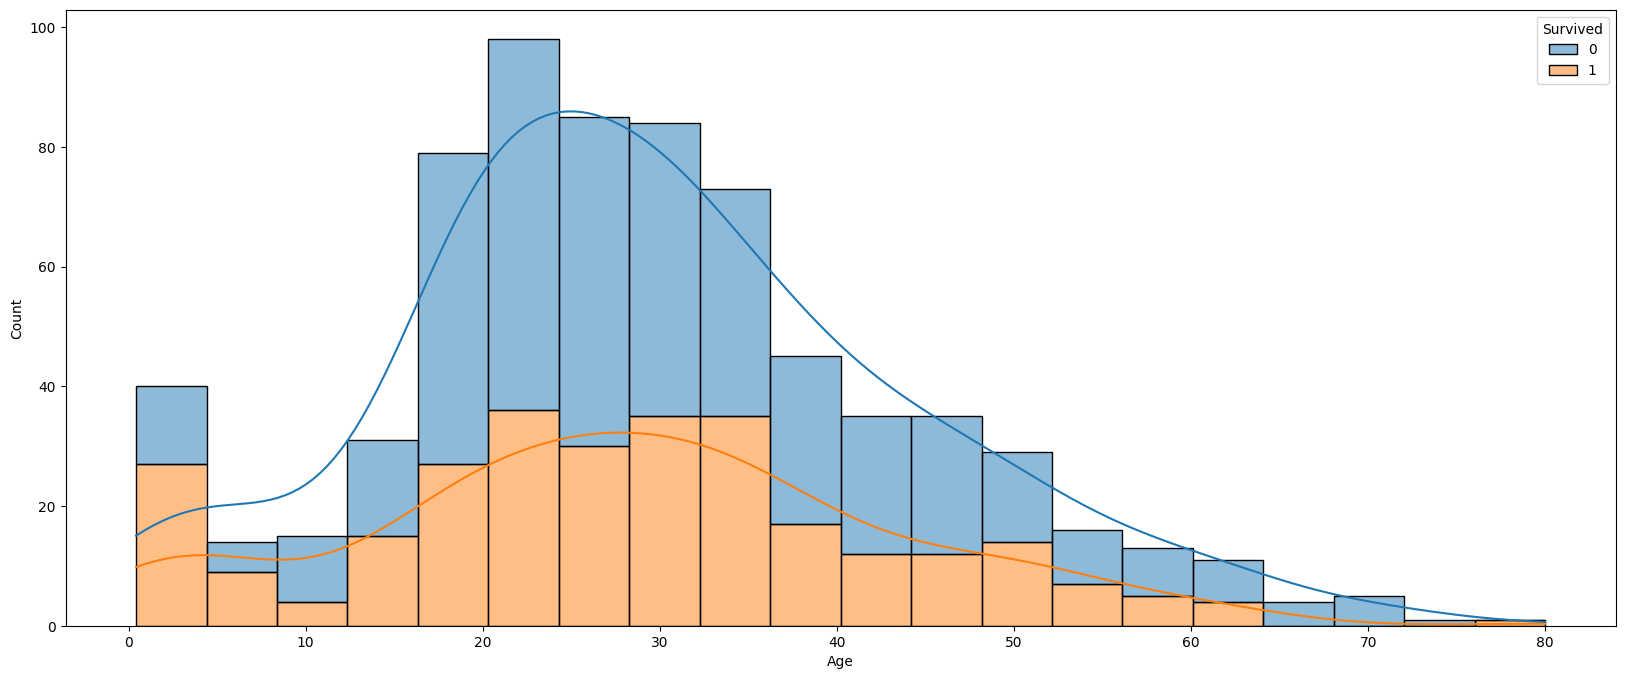

In [137]:
fig7, ax7 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", kde=True)
plt.show()

- Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.


In [146]:
max_age, min_age= df["Age"].max(), df["Age"].min()

print(f"Number of passenger with min age {min_age}: ", df[df["Age"] == min_age].shape[0])
print(f"Number of passengers with max age {max_age}: ", df[df["Age"] == max_age].shape[0])
print(f"Age with maximum number of passengers: ", list(dict(df["Age"].value_counts()).keys())[0])

Number of passenger with min age 0.42:  1
Number of passengers with max age 80.0:  1
Age with maximum number of passengers:  24.0


In [140]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

#### Survived with age group

In [158]:
print("Percentage Survived in age ranges: ")
print("Age 0-18 (Below 18) =>", df[(df["Age"] < 18) & (df["Survived"] == 1)].shape[0]/len(df) *100)
print("Age 18-30 (Adult) => ", df[(df["Age"] >= 18) & (df["Age"] <= 30) & (df["Survived"] == 1)].shape[0]/len(df) *100)
print("Age 31-45 (Matured) => ", df[(df["Age"] > 30) & (df["Age"] <= 45) & (df["Survived"] == 1)].shape[0]/len(df) *100)
print("Age 46+ (Old) =>", df[(df["Age"] > 45) & (df["Survived"] == 1)].shape[0]/len(df) *100)


print("\n Percentage Not Survived in age ranges: ")
print("Age 0-18 (Below 18) =>", df[(df["Age"] < 18) & (df["Survived"] == 0)].shape[0]/len(df) *100)
print("Age 18-30 (Adult) => ", df[(df["Age"] >= 18) & (df["Age"] <= 30) & (df["Survived"] == 0)].shape[0]/len(df) *100)
print("Age 31-45 (Matured) => ", df[(df["Age"] > 30) & (df["Age"] <= 45) & (df["Survived"] == 0)].shape[0]/len(df) *100)
print("Age 46+ (Old) =>", df[(df["Age"] > 45) & (df["Survived"] == 0)].shape[0]/len(df) *100)

Percentage Survived in age ranges: 
Age 0-18 (Below 18) => 6.846240179573512
Age 18-30 (Adult) =>  11.784511784511785
Age 31-45 (Matured) =>  9.652076318742985
Age 46+ (Old) => 4.264870931537598

 Percentage Not Survived in age ranges: 
Age 0-18 (Below 18) => 5.836139169472503
Age 18-30 (Adult) =>  21.43658810325477
Age 31-45 (Matured) =>  13.019079685746352
Age 46+ (Old) => 7.295173961840629


### Fare

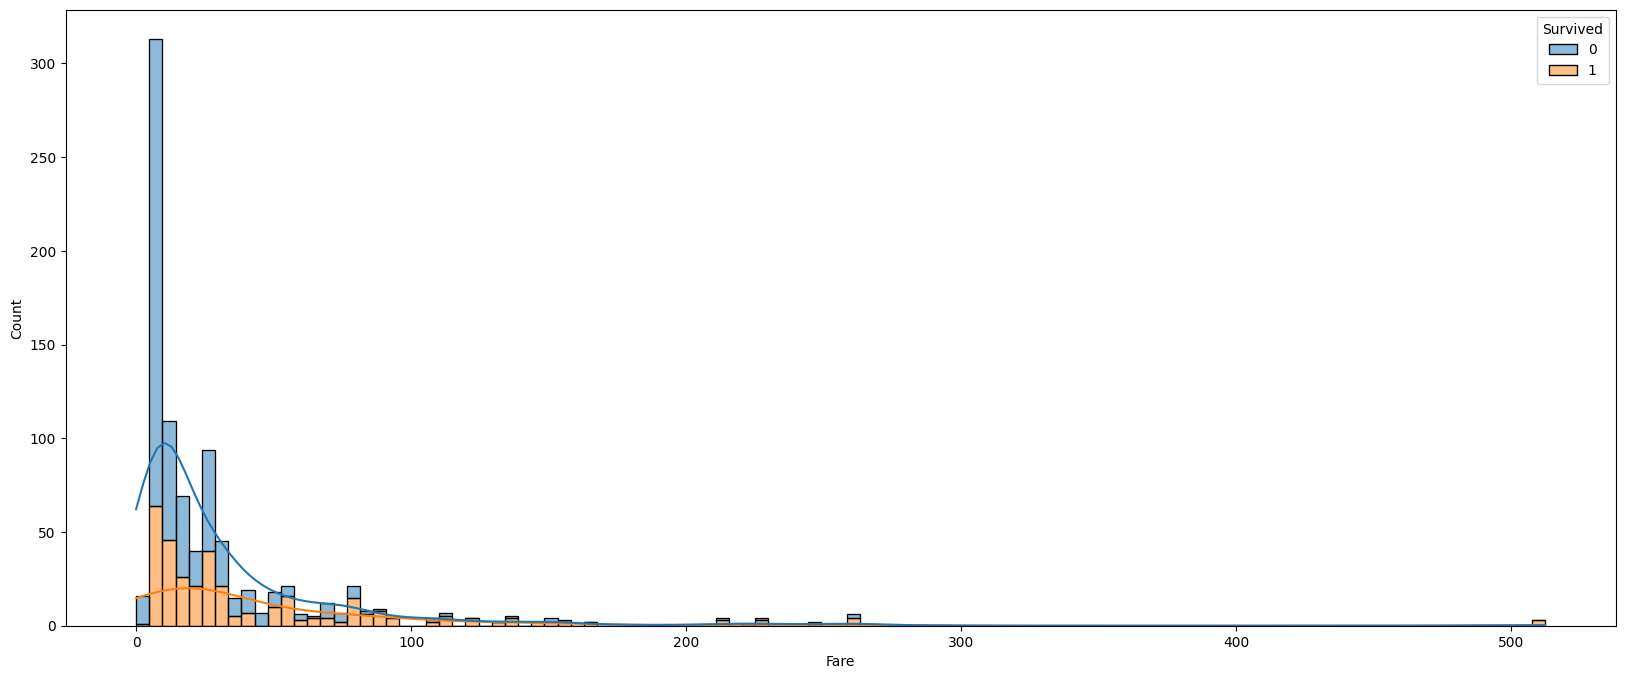

In [49]:
fig7, ax7 = plt.subplots(figsize=(20, 8))

sns.histplot(data=df, x="Fare", hue="Survived", multiple="stack", kde=True)
plt.show()

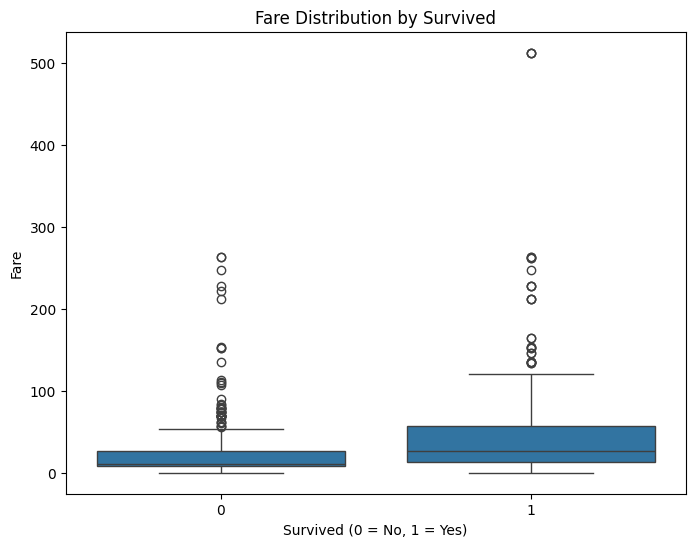

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

### SibSp

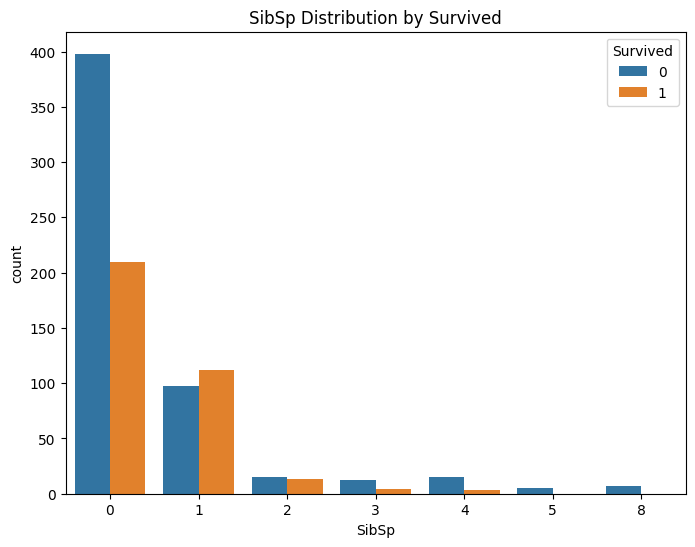

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="SibSp", hue="Survived")
plt.title(f"SibSp Distribution by Survived")
plt.show()

### Parch


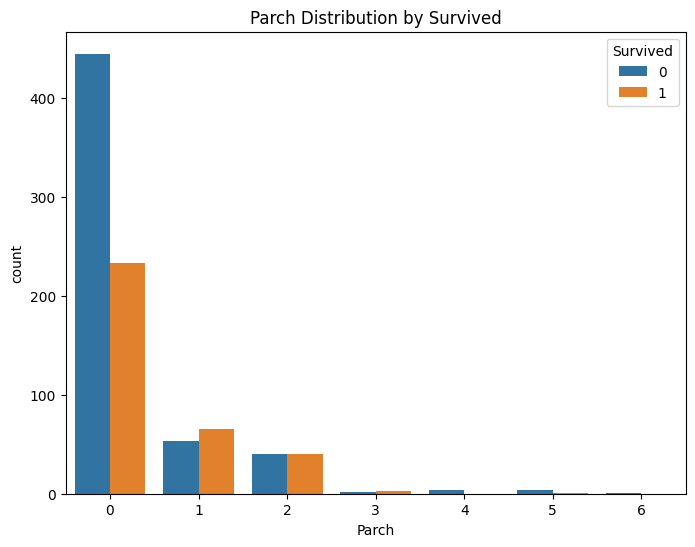

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Parch", hue="Survived")
plt.title(f"Parch Distribution by Survived")
plt.show()

### EMbarked

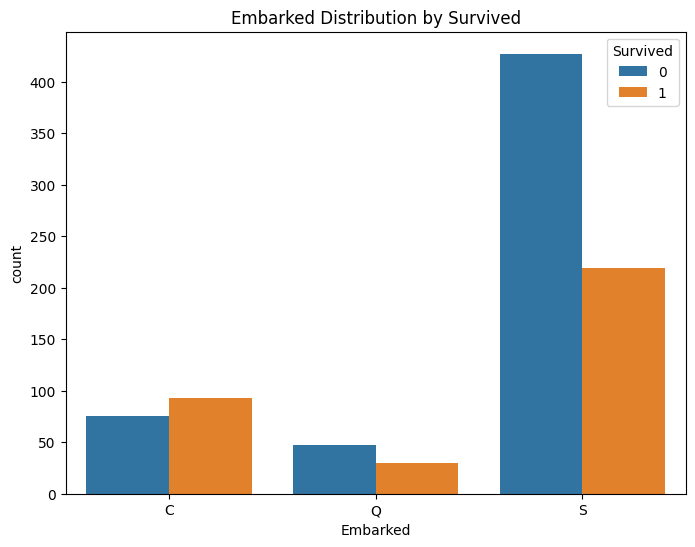

In [58]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Embarked", hue="Survived")
plt.title(f"Embarked Distribution by Survived")
plt.show()

In [59]:
corr = df[numerical_cols].corr()

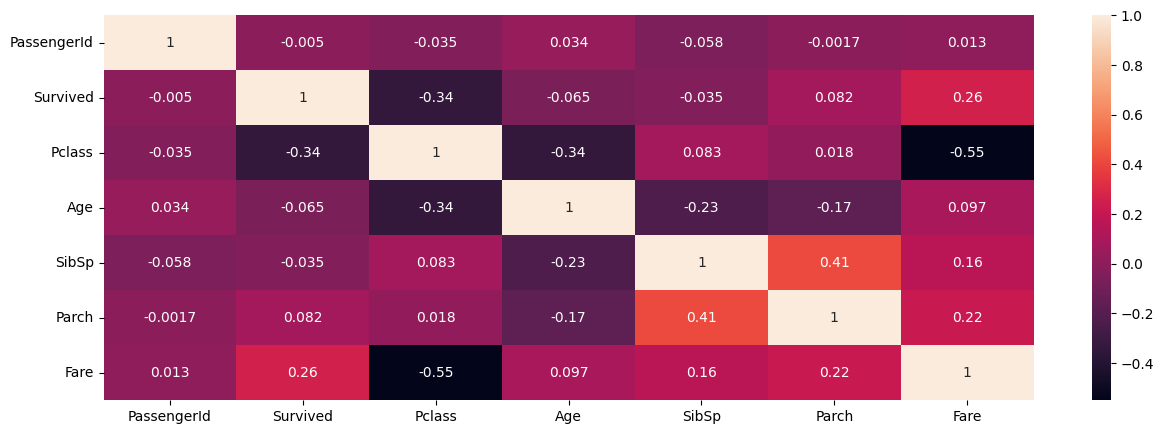

In [60]:
fig, ax = plt.subplots(figsize=(15, 5))
corrplot = sns.heatmap(data=corr, annot=True, ax=ax)
plt.show()

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [62]:
df.drop(columns=['PassengerId','Cabin','Ticket'],inplace=True)

In [63]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    int64   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    category
dtypes: category(2), float64(1), int64(5), object(1)
memory usage: 50.8+ KB


In [66]:
#df.to_csv('Preprocessed_data.csv', index=False)
